# ‚öΩ YOLOv8 Fine-tuning for Football Ball + Player Detection
This notebook fine-tunes a YOLOv8 model to detect:
- **Players**
- **Goalkeepers**
- **Referees**
- **Ball** üü† (main focus)

We‚Äôll:
1. Set up the Colab environment
2. Upload or mount the dataset
3. Inspect class balance
4. Oversample or augment ball images
5. Fine-tune YOLOv8
6. Evaluate and visualize results
7. Save and download the trained model for local use


In [1]:
# Install dependencies
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1 ultralytics -U
!pip install -q opencv-python-headless matplotlib albumentations

# Imports
import os
from pathlib import Path
import yaml
import random
import shutil
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

print("‚úÖ Environment ready.")


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 906.4/906.4 MB 1.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.2/7.2 MB 133.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.4/3.4 MB 42.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 137.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 52.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Set dataset path (EDIT THIS to match your Drive folder)
DATA_DIR = Path('/content/drive/MyDrive/Colab Notebooks/data')


assert DATA_DIR.exists(), f"{DATA_DIR} not found, please adjust the path."
print("üìÅ Dataset directory:", DATA_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
üìÅ Dataset directory: /content/drive/MyDrive/Colab Notebooks/data


## Step 1 ‚Äî Check Dataset Structure and Class Counts
We‚Äôll count how many labels each class has to detect imbalance (especially the ball class).

In [3]:
class_names = ['ball', 'goalkeeper', 'player', 'referee']  # update if different

def count_labels(label_dir):
    counts = [0] * len(class_names)
    label_files = list(Path(label_dir).glob('**/*.txt'))
    for lf in label_files:
        with open(lf, 'r') as f:
            for line in f:
                line = line.strip()
                if not line:
                    continue
                cls = int(line.split()[0])
                if cls < len(counts):
                    counts[cls] += 1
    return counts, len(label_files)

train_labels = DATA_DIR / 'train' / 'labels'
val_labels = DATA_DIR / 'valid' / 'labels'
test_labels = DATA_DIR / 'test' / 'labels'

train_counts, n_train_label_files = count_labels(train_labels)
val_counts, n_val_label_files = count_labels(val_labels)
test_counts, n_test_label_files = count_labels(test_labels)

print("Train image files:", n_train_label_files)
print("Train object counts per class:", dict(zip(class_names, train_counts)))
print("Val object counts per class:", dict(zip(class_names, val_counts)))
print("Test object counts per class:", dict(zip(class_names, test_counts)))


Train image files: 1644
Train object counts per class: {'ball': 1557, 'goalkeeper': 1173, 'player': 32850, 'referee': 3783}
Val object counts per class: {'ball': 35, 'goalkeeper': 27, 'player': 754, 'referee': 89}
Test object counts per class: {'ball': 11, 'goalkeeper': 11, 'player': 259, 'referee': 29}


## Step 2 ‚Äî Create a New `data.yaml`
We‚Äôll point training to the oversampled folder.


In [4]:
# Build a new data.yaml pointing to train_oversampled (if created) or original train
data_yaml = {
    'names': class_names,
    'nc': len(class_names),
    'train': str(DATA_DIR / 'train' / 'images'),
    'val': str(DATA_DIR / 'valid' / 'images'),
    'test': str(DATA_DIR / 'test' / 'images'),
}
yaml_path = DATA_DIR / 'data_balanced.yaml'
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f)
print("Wrote", yaml_path)
print(open(yaml_path).read())


Wrote /content/drive/MyDrive/Colab Notebooks/data/data_balanced.yaml
names:
- ball
- goalkeeper
- player
- referee
nc: 4
test: /content/drive/MyDrive/Colab Notebooks/data/test/images
train: /content/drive/MyDrive/Colab Notebooks/data/train/images
val: /content/drive/MyDrive/Colab Notebooks/data/valid/images



## Step 3 ‚Äî Fine-tune YOLOv8
We‚Äôll use a pretrained model.

We‚Äôll train with:
- Higher image size (1024) to detect small balls better
- MixUp, Mosaic augmentations (default)
- Early stopping and checkpoint saving


In [5]:
from ultralytics import YOLO
model = YOLO('../yolov8m.pt')

# training hyperparams
train_data_yaml = str(yaml_path)
imgsz = 1024                # higher resolution helps for small balls.
epochs = 80                 # increase if underfitting
batch = 8                   # reduce if you run out of GPU memory
device_to_use = 0           # if Colab GPU available, set 0. Otherwise 'cpu' or the device string you prefer

print("Training with:", model, train_data_yaml, "imgsz", imgsz)

# For emphasis on ball & players: use augment=True, and use a lower lr warmup then reduce
model.train(
    data=train_data_yaml,
    epochs=epochs,
    imgsz=imgsz,
    batch=batch,
    device=device_to_use,
    workers=4,
    optimizer="SGD",
    lr0=0.01,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    augment=True,   # includes mosaic and mixup
    patience=30,    # early stopping patience
    save=True
)

Training with: YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792cf8108260>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

## Step 3 ‚Äî Evaluate and Visualize Results
We‚Äôll use the best weights found in the training run (Ultralytics automatically saves it).


In [6]:
from pathlib import Path

best_weights = sorted(Path('../runs').glob('**/weights/best.pt'))[-1]
print("üèÜ Best model saved at:", best_weights)

model = YOLO(best_weights)
results = model.val()
print(results)


üèÜ Best model saved at: runs/detect/train/weights/best.pt
Ultralytics 8.3.213 üöÄ Python-3.12.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ‚úÖ (ping: 0.4¬±0.1 ms, read: 90.1¬±10.6 MB/s, size: 217.2 KB)
val: Scanning /content/drive/MyDrive/Colab Notebooks/data/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38/38 74.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3/3 0.5it/s 6.4s
                   all         38        905      0.906      0.836      0.889      0.677
                  ball         35         35      0.892      0.472       0.62      0.316
            goalkeeper         27         27      0.836      0.926      0.966      0.806
                player         38        754      0.962      0.981       0.99      0.853
 

## Step 5 ‚Äî Save and Download the Model for Local Use


In [7]:
from google.colab import files

# Find and download the best model
best_model_path = sorted(Path('../runs').glob('**/weights/best.pt'))[-1]
print("Downloading:", best_model_path)
files.download(best_model_path)


Downloading: runs/detect/train/weights/best.pt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Step 6 ‚Äî Visualize Predictions
Let‚Äôs look at some example detections from the validation set.



image 1/1 /content/drive/MyDrive/Colab Notebooks/data/valid/images/4b770a_3_1_png.rf.4715dcbc4be0f14fbb5d8450fcff5bf0.jpg: 576x1024 1 ball, 2 goalkeepers, 21 players, 2 referees, 46.5ms
Speed: 5.2ms preprocess, 46.5ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


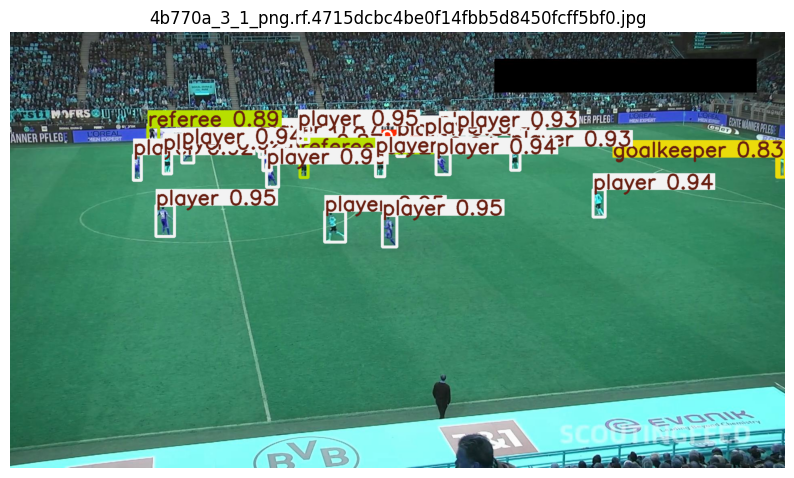


image 1/1 /content/drive/MyDrive/Colab Notebooks/data/valid/images/4b770a_3_7_png.rf.0fe6dc6c1fd85518ff5456a914a7571d.jpg: 576x1024 1 ball, 1 goalkeeper, 21 players, 3 referees, 39.5ms
Speed: 6.7ms preprocess, 39.5ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


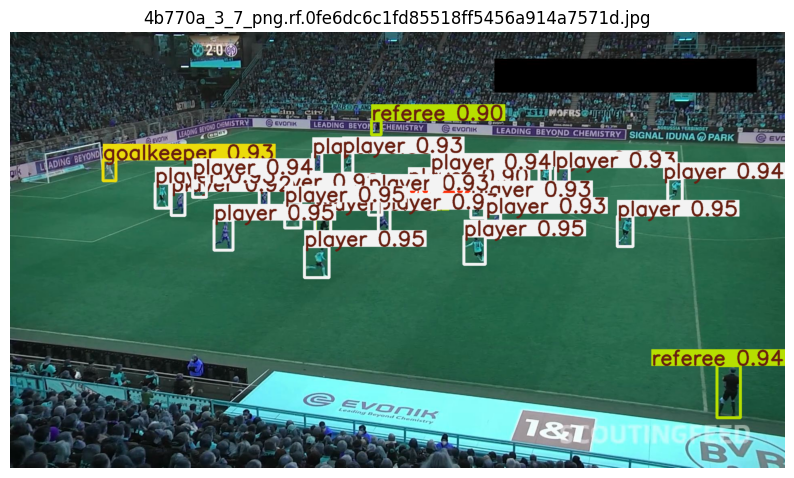


image 1/1 /content/drive/MyDrive/Colab Notebooks/data/valid/images/42ba34_1_4_png.rf.0190fbc779b7f4320c25835a5d952de0.jpg: 576x1024 2 goalkeepers, 20 players, 3 referees, 39.5ms
Speed: 6.7ms preprocess, 39.5ms inference, 2.5ms postprocess per image at shape (1, 3, 576, 1024)


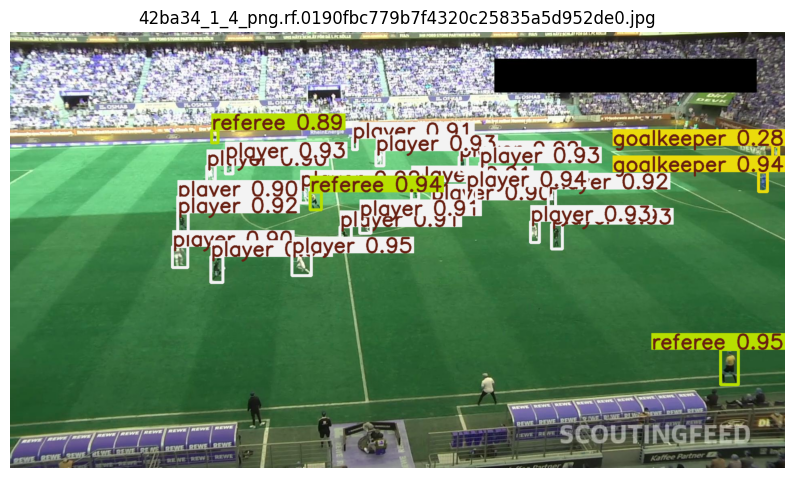


image 1/1 /content/drive/MyDrive/Colab Notebooks/data/valid/images/538438_1_5_png.rf.927cf8101773ba75712dcee17a35e56b.jpg: 576x1024 1 goalkeeper, 18 players, 3 referees, 39.5ms
Speed: 6.7ms preprocess, 39.5ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)


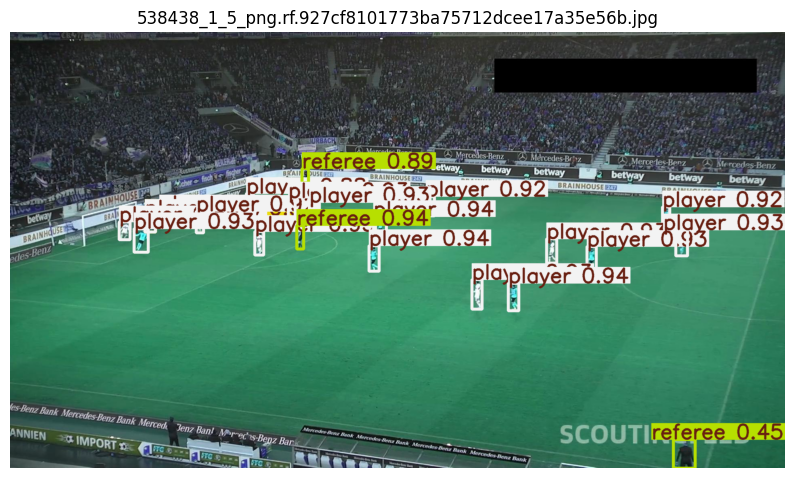


image 1/1 /content/drive/MyDrive/Colab Notebooks/data/valid/images/538438_9_8_png.rf.f77a8d26e22089ac66e5c925a6d52d70.jpg: 576x1024 1 goalkeeper, 20 players, 3 referees, 39.5ms
Speed: 6.9ms preprocess, 39.5ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)


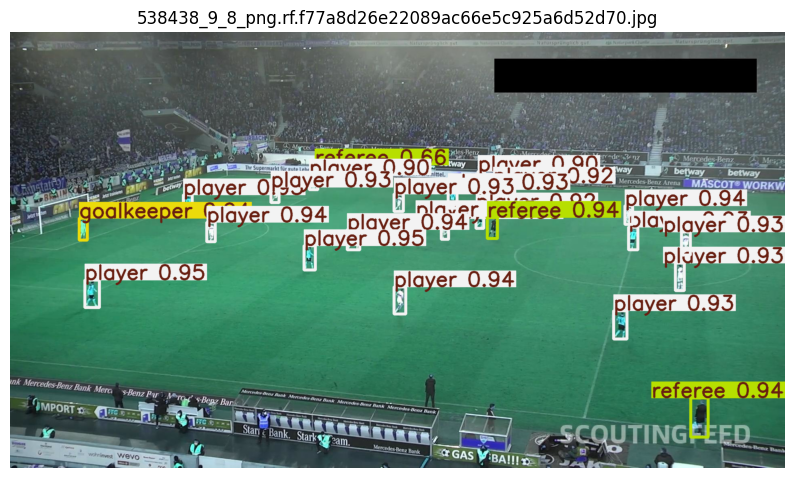

In [8]:
import random
val_images = list((DATA_DIR / 'valid' / 'images').glob('*'))
samples = random.sample(val_images, min(5, len(val_images)))

for img_path in samples:
    res = model.predict(source=str(img_path), conf=0.25)
    im = res[0].plot()
    plt.figure(figsize=(10,6))
    plt.imshow(im)
    plt.axis('off')
    plt.title(img_path.name)
    plt.show()
